# ECE1390/2390 Homework #3
Due 9/30/2025

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import time
from sklearn.mixture import GaussianMixture

## Problem 1.

The image of the Pitt Cathedral (`data/Cathedral_noisy.jpg`) has been contaminated with salt & pepper noise.  
* Implement two different types of filters to remove the salt and pepper noise.
* Show the two filtered images

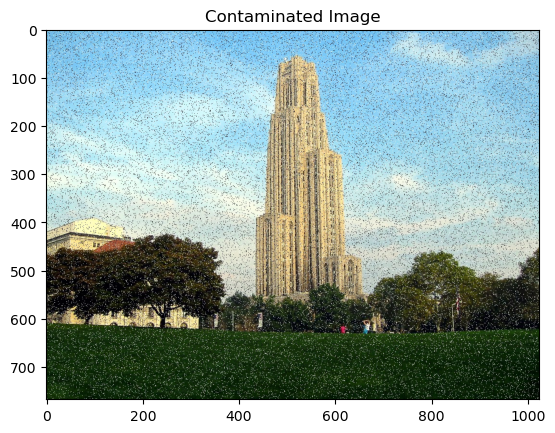

In [2]:
# Load in the image
p1_img = cv2.imread(os.path.relpath('data/Cathedral_noisy.jpg'), cv2.IMREAD_COLOR)
p1_img = cv2.cvtColor(p1_img, cv2.COLOR_BGR2RGB)

# show the image
fig, ax = plt.subplots()
ax.imshow(p1_img)
ax.set_title('Contaminated Image')
plt.show()

Split the color image into its respective RGB channels and pick a kernel size.

In [3]:
# create a tuple of rgb channels
rgb_channels = cv2.split(p1_img)

# pick a kernel size
ksize = 9

Apply a median filter and a mean filter to compare their performances.

In [4]:
# apply median filter to each channel and store as a list
mf_rgb = (cv2.medianBlur(channel, ksize) for channel in rgb_channels)
mf_rgb = list(mf_rgb)

# apply mean filter to each channel and store as a list
af_rgb = (cv2.blur(channel, (ksize, ksize)) for channel in rgb_channels)
af_rgb = list(af_rgb)

Merge the filtered channels back together.

In [5]:
# merge together the filtered channels
mf_img = cv2.merge(mf_rgb)
af_img = cv2.merge(af_rgb)

Plot the results.

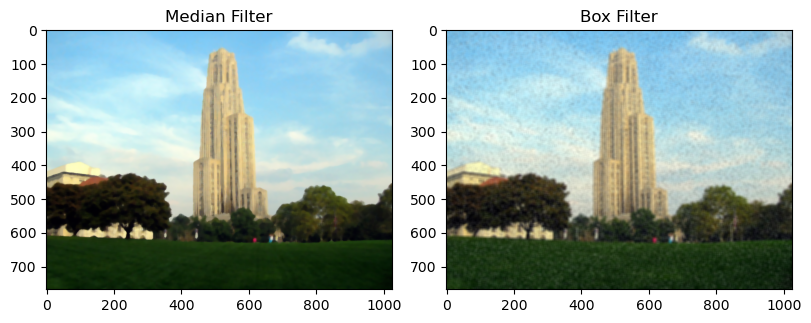

In [6]:
# show the result
fig, axs = plt.subplots(1, 2, figsize=(8,6), layout='constrained')
axs[0].imshow(mf_img)
axs[0].set_title('Median Filter')
axs[1].imshow(af_img)
axs[1].set_title('Box Filter')
plt.savefig('Data/p1sol.png', bbox_inches='tight')
plt.show()

Median filter is better at preserving edges and reducing noise because it doesn’t rely on averaging values that include outliers (like the salt-and-pepper noise), while the mean filter averages all the pixel values, including the noise.

## Problem 2.
I recently went on a trip to Alaska and afterward discovered that all of my photos had a smudge on the camera lens.

Using inpainting methods, try to remove the smudge from the image `data/Alaska.jpg` as shown below


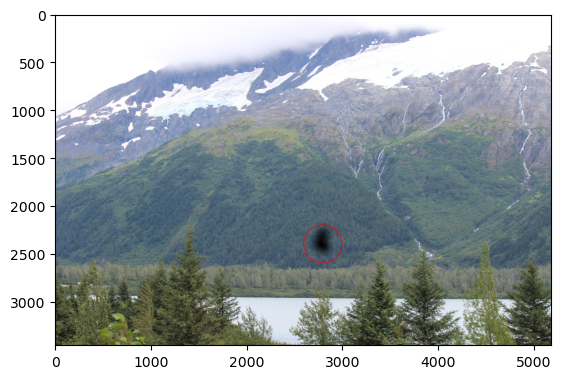

In [7]:
p2_img = cv2.imread(os.path.relpath('data/Alaska.jpg'), cv2.IMREAD_COLOR)
p2_img = cv2.cvtColor(p2_img, cv2.COLOR_BGR2RGB)

cv2.circle(p2_img, (2800,2400), 200, (255, 0, 0), thickness=5, lineType=cv2.LINE_AA)
plt.imshow(p2_img)
plt.show()

In [8]:
# work with the image without the circle
p2_img = cv2.imread(os.path.relpath('data/Alaska.jpg'), cv2.IMREAD_COLOR)
p2_img = cv2.cvtColor(p2_img, cv2.COLOR_BGR2RGB)

I'll draw an ellipse over the smudge.

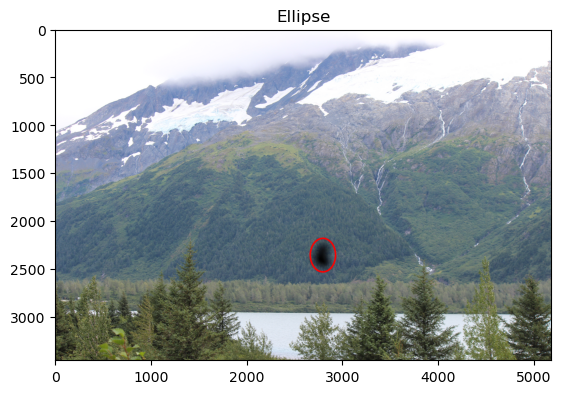

In [9]:
# make a copy for finetuning
p2_img_copy = p2_img.copy()

# finetuning parameters
center = (2800, 2360)
axes = (132, 175)  # Length of the major and minor axes
angle = 0  # Rotation angle of the ellipse

# static values
startAngle = 0  # Start angle of the elliptic arc
endAngle = 360  # End angle of the elliptic arc (360 degrees for a full ellipse)
color = (255, 0, 0)
thickness = 15
lineType = cv2.LINE_AA

# draw the ellipse
cv2.ellipse(p2_img_copy, center, axes, angle, startAngle, endAngle, color, thickness)

# show the image
fig, ax = plt.subplots()
ax.imshow(p2_img_copy)
ax.set_title('Ellipse')
plt.savefig('Data/p2ellipse.png', bbox_inches='tight')
plt.show()

Crop the image to ensure that the blur is fully inscribed by the ellipse.

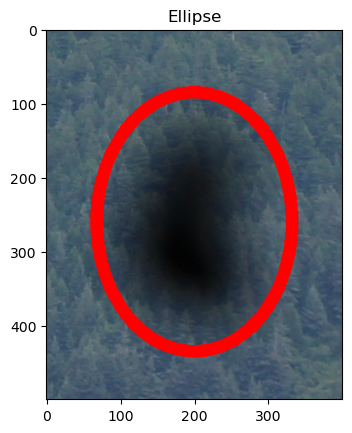

In [11]:
# crop the image around the ellipse
p2_img_copy_cropped = p2_img_copy[2100:2600, 2600:3000]

# show the cropped image
fig, ax = plt.subplots()
ax.imshow(p2_img_copy_cropped)
ax.set_title('Ellipse')
plt.savefig('Data/p2_cropped.png', bbox_inches='tight')
plt.show()

Create the mask

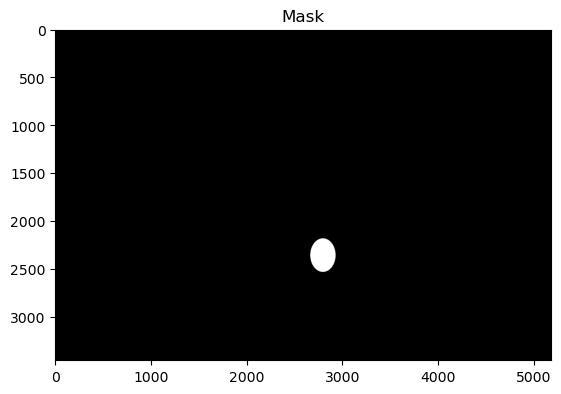

In [10]:
# Create a mask of the same size as the image, initialized to zeros (black)
mask = np.zeros(p2_img.shape[:2], dtype=np.uint8)

# Draw the circle on the mask
cv2.ellipse(mask, center, axes, angle, startAngle, endAngle, (255, 255, 255), thickness=-1) # -1 fills in the ellipse

# show the mask
fig, ax = plt.subplots()
ax.imshow(mask, cmap='gray', vmin=0, vmax=255)
ax.set_title('Mask')
plt.savefig('Data/p2mask.png', bbox_inches='tight')
plt.show()

Telea inpainting and Navier-Stokes inpainting was used to fix the smudge.

In [11]:
# Apply Telea inpainting and time it
start_time_TELEA = time.time()
TELEA_img = cv2.inpaint(p2_img, mask, inpaintRadius=10, flags=cv2.INPAINT_TELEA)
end_time_TELEA = time.time()
time_TELEA = end_time_TELEA - start_time_TELEA

# Apply Navier-Stokes inpainting and time it
start_time_NS = time.time()
NS_img = cv2.inpaint(p2_img, mask, inpaintRadius=10, flags=cv2.INPAINT_NS)
end_time_NS = time.time()
time_NS = end_time_NS - start_time_NS

Plot the results.

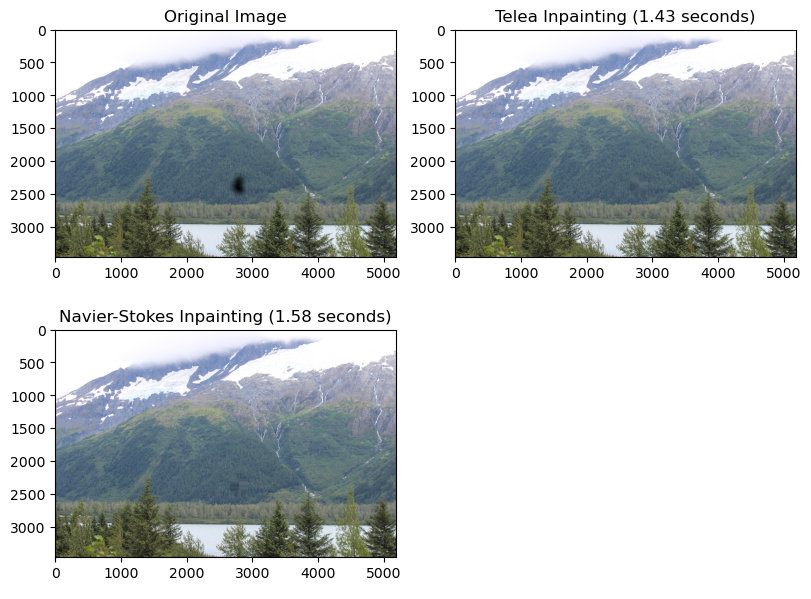

In [12]:
# Show the original and inpainted images
fig, ax = plt.subplots(2, 2, figsize=(8, 6), layout='constrained')

ax[0,0].imshow(p2_img)
ax[0,0].set_title('Original Image')

ax[0,1].imshow(TELEA_img)
ax[0,1].set_title(f'Telea Inpainting ({time_TELEA:.2f} seconds)')

ax[1,0].imshow(NS_img)
ax[1,0].set_title((f'Navier-Stokes Inpainting ({time_NS:.2f} seconds)'))

ax[1,1].axis('off')
plt.savefig('Data/p2sol.png', bbox_inches='tight')
plt.show()

## Problem 3
 
Using an edge detection filter of your choice, 

* seperate the image of the US Steel building into two images that are mostly horizontal and mostly vertical edges.  Display these two images 

* Create a 3D numpy array to hold the image of the building in the green channel position. Put the vertical edge mask image in the red channel and the horzontal edge in the blue channel and display.


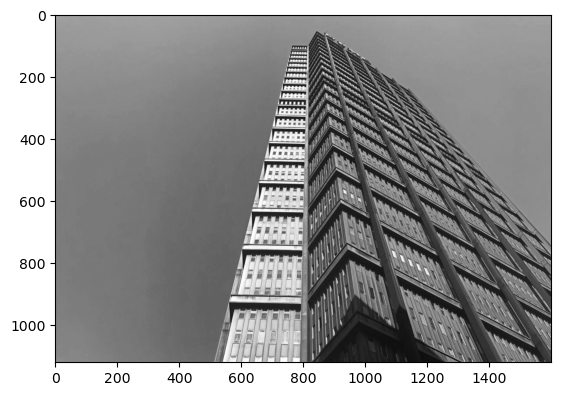

In [14]:
p3_img = cv2.imread(os.path.relpath('data/USSteel_building.jpg'), cv2.IMREAD_GRAYSCALE)
plt.imshow(p3_img,cmap='gray')
plt.show()

I'll use the Sobel filter to find the horizontal and vertical edges.

In [15]:
# Apply the Sobel filter to detect horizontal edges
sobel_h = cv2.Sobel(p3_img, cv2.CV_64F, dy=1, dx=0, ksize=3)

# Apply the Sobel filter to detect vertical edges
sobel_v = cv2.Sobel(p3_img, cv2.CV_64F, dy=0, dx=1, ksize=3)

# Convert the result to absolute values and then to uint8
sobel_h = cv2.convertScaleAbs(sobel_h)
sobel_v = cv2.convertScaleAbs(sobel_v)

Show the masks

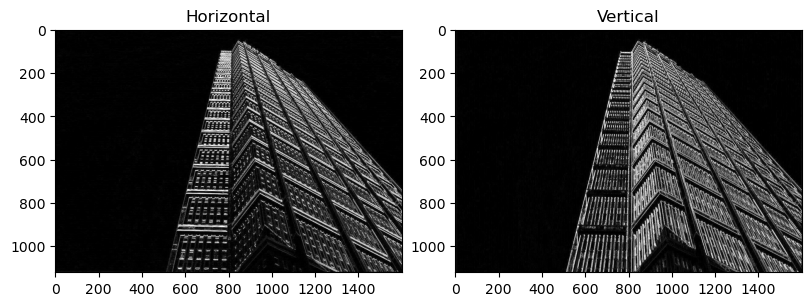

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8,6), layout='constrained')
axs[0].imshow(sobel_h, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Horizontal')
axs[1].imshow(sobel_v, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Vertical')
plt.savefig('Data/p3sobel.png', bbox_inches='tight')
plt.show()

Combine the images

In [17]:
combined_img = cv2.merge((sobel_h, p3_img, sobel_v)) # BGR format

Plot the result.

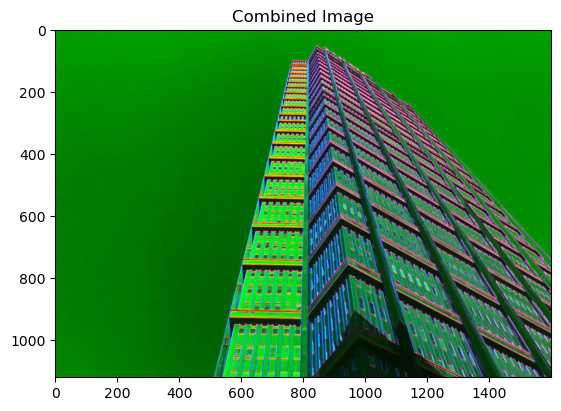

In [18]:
fig, ax = plt.subplots()
ax.imshow(combined_img)
ax.set_title('Combined Image')
plt.savefig('Data/p3sol.png', bbox_inches='tight')
plt.show()

## Problem 4
For the same image of the US Steel building used in problem 3, 

* Implement the two types of  Laplace (2nd derivative) edge detection kernels presented in lecture 7

Define the kernels

In [19]:
lap1_kernel = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

lap2_kernel = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

Apply the filter

In [21]:
lap1_filter = cv2.filter2D(p3_img, -1, lap1_kernel)
lap2_filter = cv2.filter2D(p3_img, -1, lap2_kernel)

Plot the results.

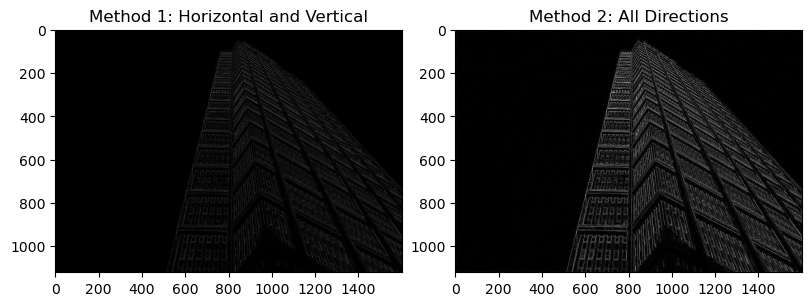

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(8,6), layout='constrained')
axs[0].imshow(lap1_filter, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Method 1: Horizontal and Vertical')
axs[1].imshow(lap2_filter, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Method 2: All Directions')
plt.show()

## Problem 5.  [ECE 2390 only]

Using the Gaussian Mixture model example presented in lecture 8, expand/rewrite the code to allow for three color clusters.  Then apply the model to segment the Pitt Seal image shown below


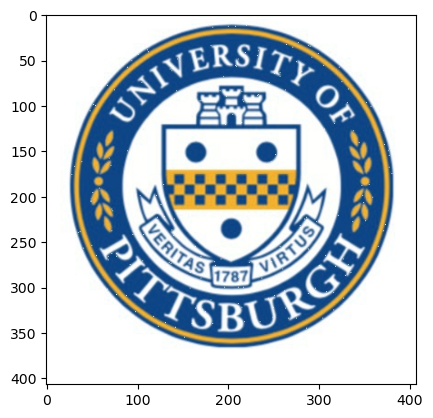

In [23]:
img = cv2.imread(os.path.relpath('data/Pitt_Seal.jpg'), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Reshape the 3D array into a 2D array. Each row corresponds to a pixel and each column represents the color channel.

In [24]:
# Reshape the image into a 2D array of pixels
pixels = img.reshape((-1, 3))

Apply the GMM. Through testing, `covariance_type='tied'` was found to be optimal (e.g., opposed to `covariance_type='full'`). `tied` means that all clusters will share the same covariance matrix.

In [25]:
n_clusters = 3  # Set the number of clusters
gmm = GaussianMixture(n_components=n_clusters, covariance_type='tied')
gmm.fit(pixels)

GaussianMixture(covariance_type='tied', n_components=3)

Predict the cluster for each pixel. Assign label based on prediction.

In [27]:
labels = gmm.predict(pixels)
segmented_image = labels.reshape(img.shape[:2])

Plot the result.

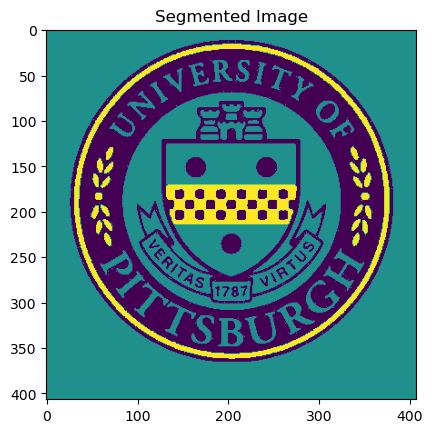

In [28]:
fig, ax = plt.subplots()
ax.imshow(segmented_image, cmap='viridis')
ax.set_title("Segmented Image")
plt.savefig('Data/p5sol.png', bbox_inches='tight')
plt.show()